Training RMSE: 343846.70843456517
Test RMSE: 370014.2484465108


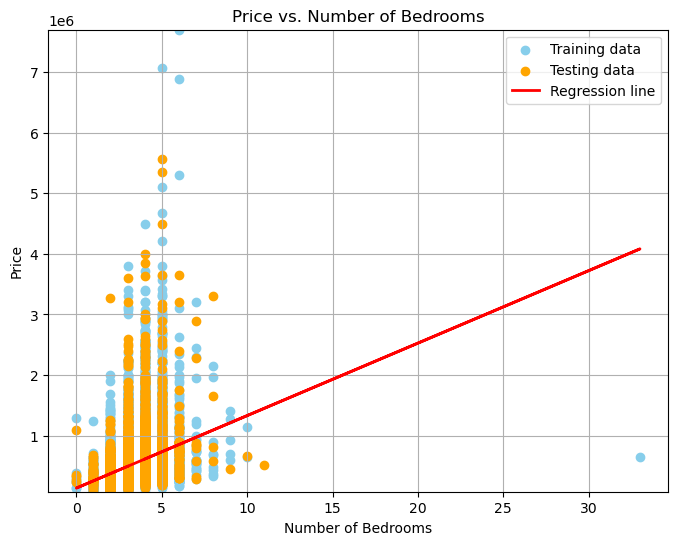

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the dataset
df = pd.read_csv('Housing.csv')

# Selecting only relevant columns for this example
df = df[['bedrooms', 'price']]

# Splitting data into features (X) and target variable (y)
X = df[['bedrooms']]
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='skyblue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Testing data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression line')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.ylim(df['price'].min(), df['price'].max())  # Set y-axis limits dynamically
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the dataset
df = pd.read_csv('Housing.csv')

# Selecting only relevant columns for this example
df = df[['bedrooms', 'price']]

# Explicitly set feature names when creating DataFrame
X = pd.DataFrame(data=df['bedrooms'], columns=['bedrooms'])
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

with warnings.catch_warnings():
    # Suppress warning related to feature names
    warnings.filterwarnings("ignore", category=UserWarning)
    model.fit(X_train, y_train)

# Function to predict price based on number of bedrooms
def predict_price(num_bedrooms):
    # Reshape input to match the model's expectations
    num_bedrooms = np.array([[num_bedrooms]])
    # Predict the price
    predicted_price = model.predict(num_bedrooms)
    return predicted_price[0]

# Example usage of the function
num_bedrooms_input = int(input("Enter the number of bedrooms: "))
predicted_price = predict_price(num_bedrooms_input)
print(f"Predicted price for {num_bedrooms_input} bedrooms: ${predicted_price/2:.2f}")


Predicted price for 10 bedrooms: $665608.35


C:\Users\andro\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
